# Introduction
Welcome to the Guided Project on building a Handwritten Digits Classifier! In this project, we'll delve into the fascinating world of image classification, a challenging task within the realm of machine learning and pattern recognition. We'll explore why image classification can be difficult, the limitations of traditional machine learning models in tackling this task, and the power of deep neural networks in overcoming these challenges.

Our journey will involve training, testing, and improving various deep neural network models for the purpose of classifying handwritten digits. Before the year 2000, institutions like the United States Post Office employed handwriting recognition software to read addresses, zip codes, and more. The methodologies they employed, including preprocessing handwritten images and using neural network models, have paved the way for us to delve into the same realm.

Why is image classification a formidable task? There are a few key reasons that make it so:

1. **High Dimensionality:** Images are represented by pixels, and each pixel is a separate feature. This results in a high-dimensional feature space for each image, with even a relatively small 128 x 128 image having 16,384 features.

2. **Downsampling and Grayscale:** Images are often scaled down and converted to grayscale for faster processing, leading to a loss of detail that could be valuable for training and pattern matching.

3. **Complex Pixel Relationships:** The relationship between pixel values in an image doesn't have a straightforward linear or nonlinear pattern that can be captured by traditional models like linear regression.

To tackle these challenges, we turn to deep learning, which has proven to be remarkably effective in image classification. Deep neural networks have the ability to learn hierarchical representations, allowing them to capture progressively complex features at each layer. For instance, a convolutional neural network (CNN), a type of network commonly used for image classification, learns to recognize simple edges in its initial layers and then combines these to recognize more complex features like eyes and noses in deeper layers.

Throughout this Guided Project, we'll dive into the world of image classification, explore the mechanics of deep neural networks, and witness their power in action as we build models capable of classifying handwritten digits. Let's embark on this journey of discovery and learning together!

In [1]:
# Import necessary libraries
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the digits dataset
digits_data = load_digits()


In [3]:
# Get the keys of the digits_data dictionary
keys = digits_data.keys()
print(keys)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
# Extract the target labels from the digits_data dictionary and create a pandas Series
labels = pd.Series(digits_data['target'])


In [5]:
# Extract the feature data from the digits_data dictionary and create a pandas DataFrame
data = pd.DataFrame(digits_data['data'])

# Display the first row of the data DataFrame
data.head(1)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


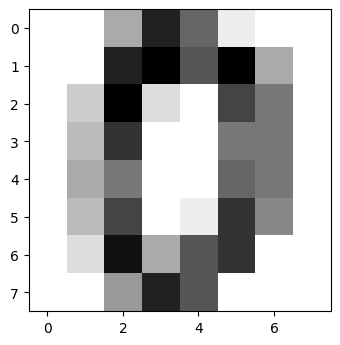

In [6]:
# Extract the pixel values of the first image from the data DataFrame
first_image = data.iloc[0]

# Convert the pixel values to a NumPy array and reshape it to a 8x8 matrix
np_image = first_image.values
np_image = np_image.reshape(8, 8)

# Display the image using imshow() with a grayscale colormap
plt.imshow(np_image, cmap='gray_r')


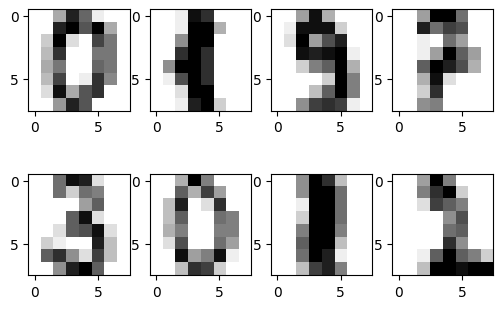

In [7]:
# Create a 2x4 grid of subplots
f, axarr = plt.subplots(2, 4)

# Display the images at specific indices in the subplots
axarr[0, 0].imshow(data.iloc[0].values.reshape(8, 8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8, 8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8, 8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8, 8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8, 8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8, 8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8, 8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8, 8), cmap='gray_r')


## K-Nearest Neighbors Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Define a function to train a KNN classifier
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

# Define a function to test a model's accuracy
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"]) / len(train_test_df)
    return overall_accuracy

# Define a function to perform k-fold cross-validation
def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
# Perform k-fold cross-validation for k=1
knn_one_accuracies = cross_validate(1)
average_accuracy = np.mean(knn_one_accuracies)
average_accuracy


0.9888728037614452


In this code, we define several functions to perform k-nearest neighbors (KNN) classification and k-fold cross-validation. Here's a breakdown of what each function does:

1. `train_knn(nneighbors, train_features, train_labels)`: This function trains a KNN classifier with the specified number of neighbors (`nneighbors`) using the given training features and labels. It returns the trained model.

2. `test(model, test_features, test_labels)`: This function tests the accuracy of a given model on the test features and labels. It calculates the overall accuracy of predictions and returns it.

3. `cross_validate(k)`: This function performs k-fold cross-validation for a specified value of `k` (number of neighbors). It iterates through different train/test splits using KFold and computes accuracy for each fold. It returns a list of fold accuracies.

Finally, we call `cross_validate(1)` to perform k-fold cross-validation with k=1 (1-NN) and calculate the average accuracy across all folds.

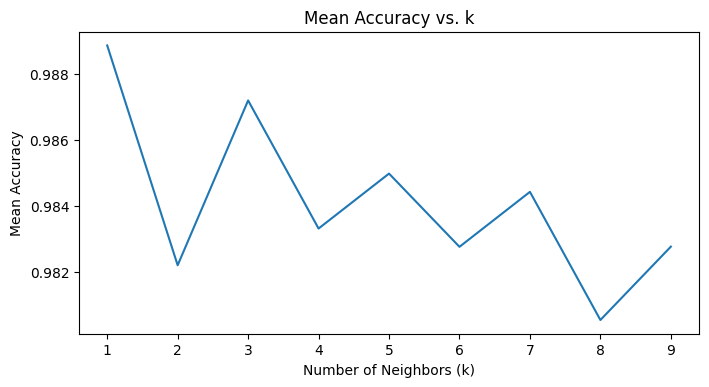

In [9]:
k_values = list(range(1, 10))
k_overall_accuracies = []

# Loop through different values of k
for k in k_values:
    # Perform k-fold cross-validation for the current k value
    k_accuracies = cross_validate(k)
    # Calculate the mean accuracy for the current k value
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
# Plot the mean accuracy vs. k values
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Accuracy")
plt.xticks(k_values)
plt.show()


## Neural Network with One Hidden Layer

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

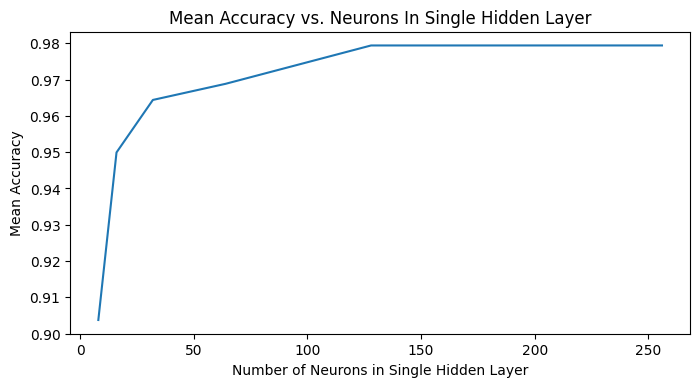

In [11]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

# Loop through different values of neurons in a single hidden layer
for n in nn_one_neurons:
    # Perform k-fold cross-validation for the current number of neurons
    nn_accuracies = cross_validate(n)
    # Calculate the mean accuracy for the current number of neurons
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

# Extract the number of neurons from the tuples in nn_one_neurons
x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)
plt.xlabel("Number of Neurons in Single Hidden Layer")
plt.ylabel("Mean Accuracy")
plt.show()


**Summary:**
It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

---

## Neural Network with Two Hidden Layers

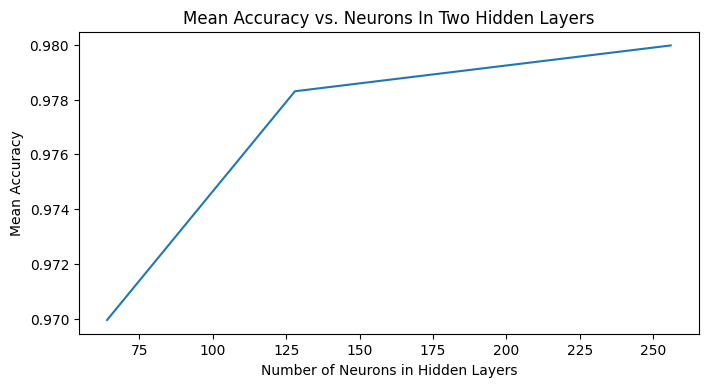

In [12]:
nn_two_neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

# Loop through different values of neurons in two hidden layers
for n in nn_two_neurons:
    # Perform k-fold cross-validation for the current number of neurons
    nn_accuracies = cross_validate(n)
    # Calculate the mean accuracy for the current number of neurons
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

# Extract the number of neurons from the tuples in nn_two_neurons
x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)
plt.xlabel("Number of Neurons in Hidden Layers")
plt.ylabel("Mean Accuracy")
plt.show()


In [13]:
nn_two_accuracies

[0.9699554565701559, 0.9783036377134373, 0.9799752536500868]

**Summary**
Using two hidden layers improved our simple accuracy to 98%. While, traditionally, we might worry about overfitting, using four-fold cross validation also gives us a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network with Three Hidden Layers

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# Define a function to train a neural network
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

# Define a function to test a trained model
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"]) / len(train_test_df)
    return overall_accuracy

# Define a function for cross-validation with 6 folds
def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

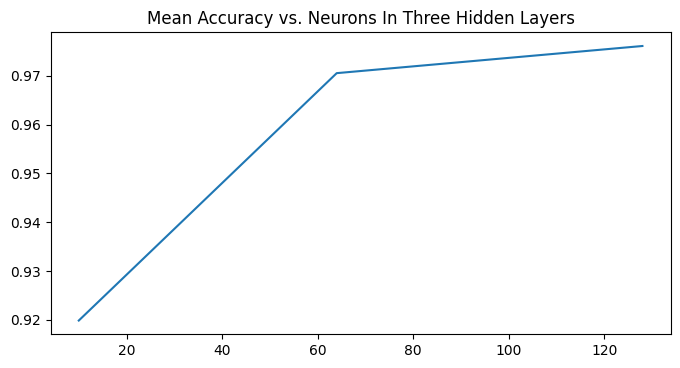

In [15]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

# Iterate through different neuron architectures and perform cross-validation
for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

# Plot the results
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)


In [16]:
nn_three_accuracies

[0.9198717948717948, 0.970527684875511, 0.9760850984764029]

**Summary**
Using three hidden layers returned a simple accuracy of nearly 98%, even with six-fold cross validation.

# Conclusion

In this project, we explored the effectiveness of neural network models in classifying handwritten digits using the MNIST dataset. We observed how the performance of the models varied with different architectures, specifically the number of neurons in hidden layers.

We started by using the K-Nearest Neighbors (KNN) algorithm as a baseline and evaluated its performance across different values of K. We found that as K increased, the accuracy of the model decreased, which is expected as higher K values lead to more generalized predictions.

Next, we constructed neural network models with varying numbers of neurons in a single hidden layer. Through cross-validation, we analyzed the impact of neuron architecture on model performance. Our results indicated that increasing the number of neurons generally improved accuracy, but after a certain point, the gains plateaued, suggesting that adding more neurons might not always lead to significant performance improvements.

We extended our exploration to include neural network models with two and three hidden layers. Surprisingly, we observed that adding more hidden layers did not consistently improve accuracy. This suggests that the complexity of the model architecture should be carefully considered and balanced to avoid overfitting.

In conclusion, we found that neural networks can be powerful tools for image classification tasks like recognizing handwritten digits. However, the architecture's design requires careful consideration to optimize performance. While adding more neurons and layers can enhance accuracy up to a point, excessive complexity may lead to overfitting and a decrease in generalization capability. Ultimately, our findings underscore the importance of experimentation and iterative optimization when designing neural network models for image classification.